## Deep Learning with Python ３章勉強ノート（その２）
ManningのMEAP（出版前の本のできた部分から読めるサービス）でTensorFlowとTheanoの両方に対応したラッパーツールkerasの作者Francois Chollet氏の「Deep Learning with Python」が発売されました。

4章では、

### 前準備
jupyterノートブックで使用するnumpy、pandas、seabornとmatplotlibをインポートします。
次に、kerasで使うパッケージをインポートします。

In [4]:
# 可視化用のライブラリをインポート（numpy, pandasを含む）
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt 
%matplotlib inline

# keras用のパッケージをインポート
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

### 過学習との戦い
３章の二値分類の例題を使ってモデルを変更すると過学習の様子がどのように変化するか試してみます。

最初にもう一度データを準備します。

In [5]:
# imdbデータの準備
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(nb_words=10000)

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)
# our vectorized labels:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### オリジナルのモデルを実行


In [7]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
org_history = model.fit(partial_x_train, partial_y_train, nb_epoch=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 218s - loss: 0.5038 - acc: 0.7880 - val_loss: 0.3868 - val_acc: 0.8673
Epoch 2/20
15000/15000 [==============================] - 3s - loss: 0.3013 - acc: 0.9057 - val_loss: 0.3267 - val_acc: 0.8742
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2233 - acc: 0.9256 - val_loss: 0.2770 - val_acc: 0.8939
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1754 - acc: 0.9452 - val_loss: 0.2730 - val_acc: 0.8922
Epoch 5/20
15000/15000 [==============================] - 3s - loss: 0.1451 - acc: 0.9542 - val_loss: 0.2803 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1166 - acc: 0.9649 - val_loss: 0.2988 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1021 - acc: 0.9691 - val_loss: 0.3045 - val_acc: 0.8845
Epoch 8/20
15000/15000 [==============================] - 2

In [12]:
# 特徴ベクトルを小さく（4）にしたモデルを使って分類する
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=10000))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#
small_history = model.fit(partial_x_train, partial_y_train, nb_epoch=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
 1024/15000 [=>............................] - ETA: 68s - loss: 0.6900 - acc: 0.5586 

/usr/lib/sagemath/local/lib/python2.7/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148245). Check your callbacks.
  % delta_t_median)


15000/15000 [==============================] - 92s - loss: 0.5601 - acc: 0.7717 - val_loss: 0.4623 - val_acc: 0.8370
Epoch 2/20
15000/15000 [==============================] - 4s - loss: 0.3849 - acc: 0.8919 - val_loss: 0.3657 - val_acc: 0.8772
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2946 - acc: 0.9147 - val_loss: 0.3192 - val_acc: 0.8853
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.2389 - acc: 0.9305 - val_loss: 0.2967 - val_acc: 0.8870
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.2006 - acc: 0.9401 - val_loss: 0.2802 - val_acc: 0.8898
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1726 - acc: 0.9484 - val_loss: 0.2854 - val_acc: 0.8859
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1520 - acc: 0.9549 - val_loss: 0.2893 - val_acc: 0.8835
Epoch 8/20
15000/15000 [==============================] - 2s - loss: 0.1330 - acc: 0.9621 - val_loss: 0.2822 - val_acc: 0

In [13]:
# 特徴ベクトルを大きく（512）にしたを使って分類する
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=10000))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#
big_history = model.fit(partial_x_train, partial_y_train, nb_epoch=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 25s - loss: 0.5285 - acc: 0.7577 - val_loss: 0.2933 - val_acc: 0.8834
Epoch 2/20
15000/15000 [==============================] - 18s - loss: 0.2504 - acc: 0.9030 - val_loss: 0.6006 - val_acc: 0.7746
Epoch 3/20
15000/15000 [==============================] - 19s - loss: 0.1632 - acc: 0.9399 - val_loss: 0.4680 - val_acc: 0.8325
Epoch 4/20
15000/15000 [==============================] - 18s - loss: 0.1142 - acc: 0.9664 - val_loss: 0.3351 - val_acc: 0.8896
Epoch 5/20
15000/15000 [==============================] - 18s - loss: 0.0284 - acc: 0.9931 - val_loss: 0.9494 - val_acc: 0.7924
Epoch 6/20
15000/15000 [==============================] - 18s - loss: 0.0085 - acc: 0.9982 - val_loss: 0.5022 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 18s - loss: 0.0290 - acc: 0.9961 - val_loss: 1.4520 - val_acc: 0.7801
Epoch 8/20
15000/15000 [==============================

In [23]:
org_val_loss = org_history.history['val_loss']
small_val_loss = small_history.history['val_loss']
big_val_loss = big_history.history['val_loss']

In [37]:
dict = {'org_val_loss':org_val_loss,  'small_val_loss': small_val_loss,  'big_val_loss': big_val_loss}
df_val_loss = pd.DataFrame(dict)

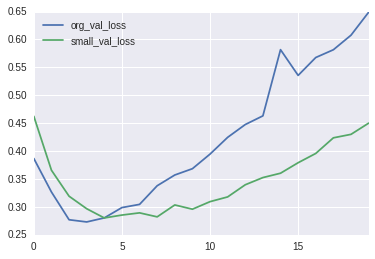

In [41]:
df_val_loss[['org_val_loss', 'small_val_loss']].plot()
plt.show()

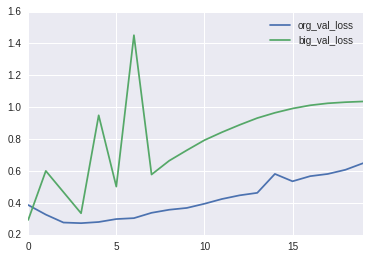

In [42]:
df_val_loss[['org_val_loss', 'big_val_loss']].plot()
plt.show()